<a href="https://colab.research.google.com/github/purushothaman7/DLC-Lab/blob/main/Handwriting%20Recognition%20on%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow keras scikit-learn


In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9896 - loss: 0.0330 - val_accuracy: 0.9800 - val_loss: 0.0743
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9918 - loss: 0.0259 - val_accuracy: 0.9790 - val_loss: 0.0746
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9935 - loss: 0.0215 - val_accuracy: 0.9792 - val_loss: 0.0826
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9944 - loss: 0.0176 - val_accuracy: 0.9797 - val_loss: 0.0797
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9962 - loss: 0.0135 - val_accuracy: 0.9803 - val_loss: 0.0821
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9963 - loss: 0.0124 - val_accuracy: 0.9790 - val_loss: 0.0891
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9974 - loss: 0.0095 - val_accuracy: 0.9793 - val_loss: 0.0861
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9974 - loss: 0.0087 -

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 0s - 1ms/step - accuracy: 0.9762 - loss: 0.0778

Test accuracy: 0.9761999845504761


In [6]:
predictions = model.predict(x_test)
predicted_digit = predictions[0].argmax()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


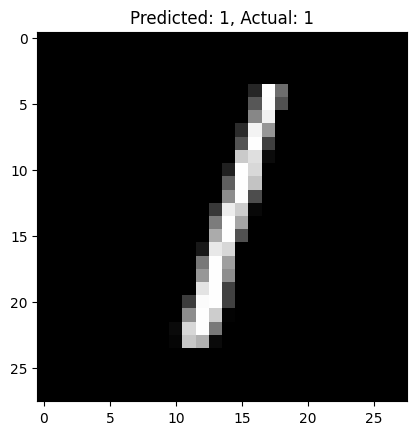

In [22]:
import matplotlib.pyplot as plt

def plot_digit(index):

    plt.imshow(x_test[index], cmap=plt.cm.gray)
    plt.title(f'Predicted: {predictions[index].argmax()}, Actual: {y_test[index]}')
    plt.show()

plot_digit(1)
